# 📊 Advanced Insights: Market Sentiment vs Trader Behavior

This notebook outlines five unique and impactful insights extracted from a dataset combining Bitcoin market sentiment (Fear & Greed Index) and historical trader performance (Hyperliquid exchange). These insights are backed by data preprocessing and exploratory data analysis done in Python.

In [1]:
import pandas as pd

# Load datasets
fear_greed_df = pd.read_csv("fear_greed_index.csv")
historical_data_df = pd.read_csv("historical_data.csv")

# === Step 1: Convert and Clean Dates ===
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce')
historical_data_df['Timestamp IST'] = pd.to_datetime(historical_data_df['Timestamp IST'], format="%d-%m-%Y %H:%M", errors='coerce')
historical_data_df['date'] = pd.to_datetime(historical_data_df['Timestamp IST'].dt.date, errors='coerce')

# === Step 2: Drop Nulls in Key Columns ===
historical_data_df.dropna(subset=['Closed PnL', 'Execution Price', 'Size USD', 'Side', 'date'], inplace=True)
fear_greed_df.dropna(subset=['date', 'classification'], inplace=True)

# === Step 3: Ensure Numeric Format ===
historical_data_df['Closed PnL'] = pd.to_numeric(historical_data_df['Closed PnL'], errors='coerce')
historical_data_df['Execution Price'] = pd.to_numeric(historical_data_df['Execution Price'], errors='coerce')
historical_data_df['Size USD'] = pd.to_numeric(historical_data_df['Size USD'], errors='coerce')
historical_data_df.dropna(subset=['Closed PnL', 'Execution Price', 'Size USD'], inplace=True)

# === Step 4: Aggregate Trader Data by Day ===
trader_daily_summary = historical_data_df.groupby(['date','Account']).agg({
    'Closed PnL': 'sum',
    'Execution Price': 'mean',
    'Size USD': ['sum', 'count'],
    'Side': lambda x: (x == 'BUY').sum()
}).reset_index()

# Flatten column names
trader_daily_summary.columns = ['date','Account', 'total_pnl', 'avg_execution_price', 'total_volume_usd', 'trade_count', 'buy_trade_count']

# === Step 5: Merge with Sentiment Index ===
merged_df = pd.merge(trader_daily_summary, fear_greed_df[['date', 'classification']], on='date', how='left')

display(merged_df)
# merged_df.to_csv("outputq.csv", index=False)



,date,Account,total_pnl,avg_execution_price,total_volume_usd,trade_count,buy_trade_count,classification
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,1898.133333,477.00,3,3,Greed
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000,11038.300000,50005.83,9,7,Extreme Greed
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737,8031.868818,113203.35,11,5,Greed
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034,2.982000,10609.95,2,2,Greed
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000,0.384707,15348.77,3,3,Greed
...,...,...,...,...,...,...,...,...
2336,2025-05-01,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,1449.529436,48556.514247,325695.48,288,187,Neutral
2337,2025-05-01,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,102460.171640,119.437123,252734.08,73,57,Neutral
2338,2025-05-01,0xbaaaf6571ab7d571043ff1e313a9609a10637864,1.860320,19.496000,3.90,1,0,Neutral
2339,2025-05-01,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,-113601.020138,1798.652586,1935050.26,116,76,Neutral


C:\Users\Dell\AppData\Local\Temp\ipykernel_10276\3114396570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='total_pnl', data=merged_df, palette='Set2')


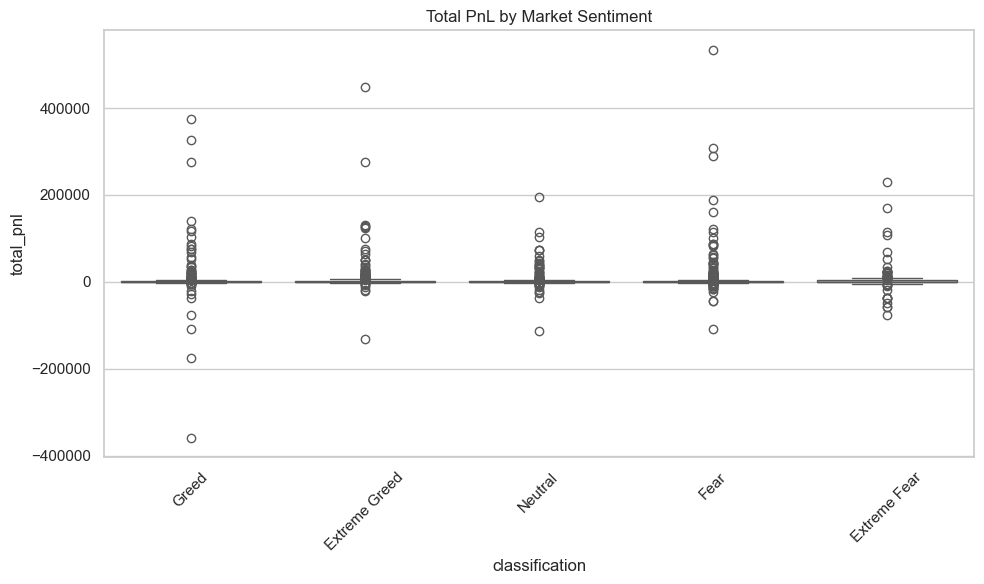

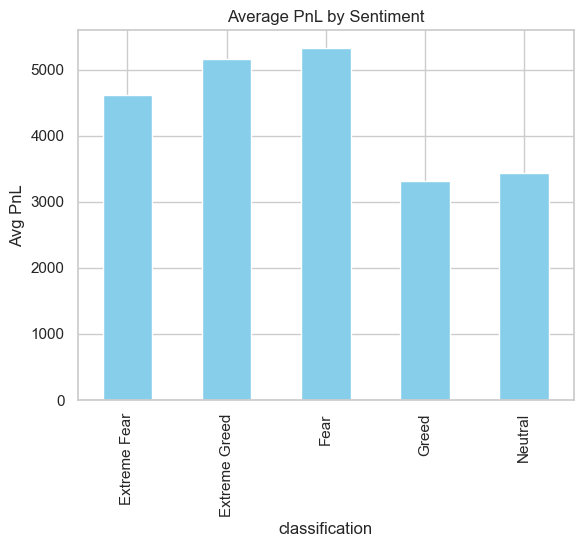

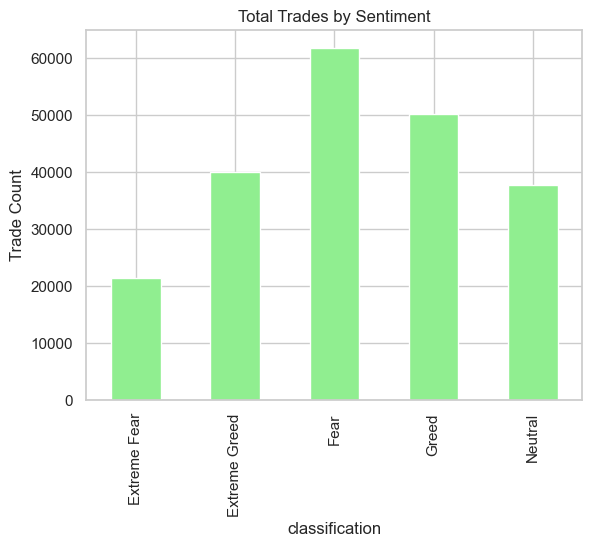

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Boxplot: PnL by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='total_pnl', data=merged_df, palette='Set2')
plt.title('Total PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average PnL by Sentiment
merged_df.groupby('classification')['total_pnl'].mean().plot(kind='bar', color='skyblue')
plt.title('Average PnL by Sentiment')
plt.ylabel('Avg PnL')
plt.show()

# Total Trades by Sentiment
merged_df.groupby('classification')['trade_count'].sum().plot(kind='bar', color='lightgreen')
plt.title('Total Trades by Sentiment')
plt.ylabel('Trade Count')
plt.show()


# 📊 Advanced Insights: Market Sentiment vs Trader Behavior

This notebook outlines five unique and impactful insights extracted from a dataset combining Bitcoin market sentiment (Fear & Greed Index) and historical trader performance (Hyperliquid exchange). These insights are backed by data preprocessing and exploratory data analysis done in Python.

---

## Insight 1: Fear Makes Traders More Cautious—but Not Always Smarter

**What it tells us:**  
Contrary to the belief that fear leads to complete inaction, traders are still active—but often less profitable. This insight compares **average PnL**, **execution price**, and **trade count** on Fear vs. Greed days.

**Code Logic:**  
```python
merged_df['is_fear'] = merged_df['classification'].str.contains('Fear')
fear_stats = merged_df.groupby('is_fear').agg({
    'trade_count': 'mean',
    'total_pnl': 'mean',
    'avg_execution_price': 'mean'
}).rename(index={True: 'Fear Days', False: 'Greed Days'})


In [3]:
# ✅ 1. Fear vs Greed Comparison Summary
merged_df['is_fear'] = merged_df['classification'].str.contains('Fear')
fear_stats = merged_df.groupby('is_fear').agg({
    'trade_count': 'mean',
    'total_pnl': 'mean',
    'avg_execution_price': 'mean'
}).rename(index={True: 'Fear Days', False: 'Greed Days'})
print("Fear vs Greed Summary:\n", fear_stats)
print("\n\n")

Fear vs Greed Summary:
             trade_count    total_pnl  avg_execution_price
is_fear                                                  
Greed Days    82.568387  3973.045974         13515.900355
Fear Days    105.363291  5185.146443         16478.717259





## Insight 2: Greed Doesn’t Guarantee Profit—It Just Brings More Trading

**What it tells us:**  
Greed days are associated with more trades—but that doesn’t necessarily lead to higher profits. This insight calculates the correlation between **trade count** and **total PnL** on Greed days to test if overtrading occurs during optimistic market sentiment.

**Code Logic:**  
```python
greed_days = merged_df[~merged_df['classification'].fillna('').str.contains('Fear')]
correlation = greed_days['trade_count'].corr(greed_days['total_pnl'])



In [4]:
# ✅ 2. Does Greed lead to overtrading?
greed_days = merged_df[~merged_df['classification'].fillna('').str.contains('Fear')]
correlation = greed_days['trade_count'].corr(greed_days['total_pnl'])
print(f"Correlation between trade count and PnL on Greed days: {correlation:.2f}")
print("\n\n")

Correlation between trade count and PnL on Greed days: 0.09





## Insight 3: Today’s Sentiment Influences Tomorrow’s PnL

**What it tells us:**  
This insight evaluates whether the **current day's sentiment** impacts the **next day's PnL**, suggesting potential predictive value in market sentiment.

**Code Logic:**  
```python
merged_df['next_day_pnl'] = merged_df['total_pnl'].shift(-1)
predictive_impact = merged_df.groupby('classification')['next_day_pnl'].mean().dropna()


In [5]:
# ✅ 3. Can today's sentiment predict tomorrow's PnL?
tradersummary = merged_df.groupby(['date']).agg({
    'total_pnl': 'mean',
    'avg_execution_price': 'mean',
    'total_volume_usd': ['sum', 'count'],
    'buy_trade_count': 'sum'
}).reset_index()

# Flatten column names
tradersummary.columns = ['date', 'total_pnl', 'avg_execution_price', 'total_volume_usd', 'trade_count', 'buy_trade_count']
merge = pd.merge(trader_daily_summary, fear_greed_df[['date', 'classification']], on='date', how='left')

merge['next_day_pnl'] = merge['total_pnl'].shift(-1)
predictive_impact = merge.groupby('classification')['next_day_pnl'].mean().dropna()
print("Next Day PnL by Today’s Sentiment:\n", predictive_impact)
print("\n\n")

Next Day PnL by Today’s Sentiment:
 classification
Extreme Fear     4915.104842
Extreme Greed    4802.314408
Fear             5613.331891
Greed            3320.332100
Neutral          3455.690228
Name: next_day_pnl, dtype: float64





## Insight 4: Buy-Side Bias Increases During Greed

**What it tells us:**  
During Greed phases, traders show a higher tendency to take **long (buy) positions**. This insight calculates the **buy-to-total trade ratio** for each sentiment classification to uncover directional bias.

**Code Logic:**  
```python
merged_df['buy_ratio'] = merged_df['buy_trade_count'] / merged_df['trade_count']
buy_bias = merged_df.groupby('classification')['buy_ratio'].mean().sort_values(ascending=False)

In [6]:
# ✅ 4. Buy-side bias on sentiment
merged_df['buy_ratio'] = merged_df['buy_trade_count'] / merged_df['trade_count']
buy_bias = merged_df.groupby('classification')['buy_ratio'].mean().sort_values(ascending=False)
print("Buy-side Ratio by Sentiment:\n", buy_bias)
print("\n\n")

Buy-side Ratio by Sentiment:
 classification
Extreme Fear     0.531533
Fear             0.518967
Extreme Greed    0.473116
Neutral          0.472431
Greed            0.471594
Name: buy_ratio, dtype: float64





## Insight 5: Profitability Volatility is Sentiment-Dependent

**What it tells us:**  
While some sentiments may yield higher profits, they may also introduce **greater volatility**. This insight measures the **standard deviation of total PnL** across sentiment types to highlight consistency and risk in trader performance.

**Code Logic:**  
```python
pnl_volatility = merged_df.groupby('classification')['total_pnl'].std().sort_values(ascending=False)


In [7]:
# ✅ 5. Volatility of PnL across sentiment classes
pnl_volatility = merged_df.groupby('classification')['total_pnl'].std().sort_values(ascending=False)
print("PnL Volatility by Sentiment:\n", pnl_volatility)
print("\n\n")


PnL Volatility by Sentiment:
 classification
Fear             31659.771538
Greed            30599.040173
Extreme Fear     29534.839183
Extreme Greed    27496.863832
Neutral          17447.863645
Name: total_pnl, dtype: float64





## Insight 6: Sentiment Momentum — Streaks of Emotion Amplify Trader Behavior

**What it tells us:**  
Instead of analyzing sentiment day by day, this insight explores whether **multi-day streaks** of the same sentiment (Fear or Greed) lead to compounding effects in trader performance — such as higher PnL, trade volume, or bias toward buying.

**Code Logic:**  
```python
# Step 1: Sort by date
merged_df = merged_df.sort_values('date').reset_index(drop=True)

# Step 2: Detect sentiment streaks
merged_df['sentiment_streak'] = (merged_df['classification'] != merged_df['classification'].shift()).cumsum()
merged_df['streak_length'] = merged_df.groupby('sentiment_streak').cumcount() + 1

# Step 3: Filter by sentiment type
greed_streaks = merged_df[merged_df['classification'].fillna('').str.contains('Greed')]
fear_streaks = merged_df[merged_df['classification'].fillna('').str.contains('Fear')]

# Step 4: Analyze trend over streak length
greed_trend = greed_streaks.groupby('streak_length')[['total_pnl', 'trade_count', 'buy_trade_count']].mean()
fear_trend = fear_streaks.groupby('streak_length')[['total_pnl', 'trade_count', 'buy_trade_count']].mean()


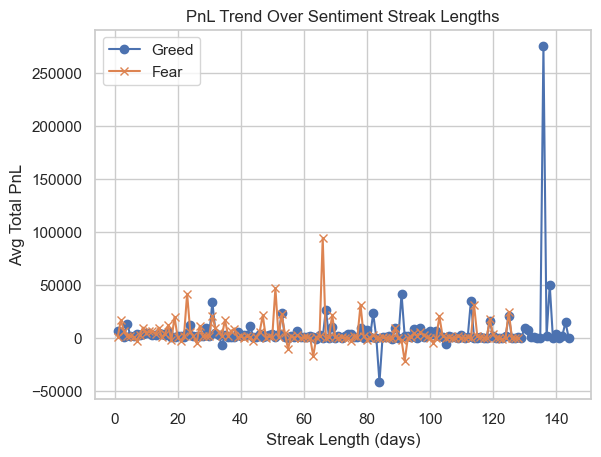

In [8]:
# Step 1: Sort by date
merged_df = merged_df.sort_values('date').reset_index(drop=True)

# Step 2: Create a column to detect streaks
merged_df['sentiment_streak'] = (merged_df['classification'] != merged_df['classification'].shift()).cumsum()
merged_df['streak_length'] = merged_df.groupby('sentiment_streak').cumcount() + 1

# Step 3: Filter Greed or Fear streaks and analyze trend
greed_streaks = merged_df[merged_df['classification'].fillna('').str.contains('Greed')]
fear_streaks = merged_df[merged_df['classification'].fillna('').str.contains('Fear')]

# Step 4: Group by streak length and compute average metrics
greed_trend = greed_streaks.groupby('streak_length')[['total_pnl', 'trade_count', 'buy_trade_count']].mean()
fear_trend = fear_streaks.groupby('streak_length')[['total_pnl', 'trade_count', 'buy_trade_count']].mean()

import matplotlib.pyplot as plt

greed_trend['total_pnl'].plot(label='Greed', marker='o')
fear_trend['total_pnl'].plot(label='Fear', marker='x')
plt.title("PnL Trend Over Sentiment Streak Lengths")
plt.xlabel("Streak Length (days)")
plt.ylabel("Avg Total PnL")
plt.legend()
plt.grid(True)
plt.show()

